In [1]:
import pandas as pd

df1 = pd.read_csv("checkpoints.csv")
df2 = pd.read_csv("page_views.csv")

df1_copy = df1.copy()
df1_copy.drop(columns=["release", "construct", "response"], inplace=True)
df1_copy.dropna(inplace=True)
df1_copy.drop(df1_copy[df1_copy['n_attempt'] > 1000].index, inplace=True)
df1_copy.drop_duplicates(inplace=True)

df1_copy.sort_values(by=['student_id', 'chapter_number'])

/var/folders/pg/yx5qvf2j0433sn1bs15cb74w0000gp/T/ipykernel_71112/3465466040.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("page_views.csv")


,book,institution_id,class_id,student_id,chapter_number,EOC,n_possible,n_correct,n_attempt
1203,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,2,0.839080,87.0,73.0,127.0
1204,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,3,0.769231,104.0,80.0,145.0
1205,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,4,0.743590,118.0,87.0,217.0
1206,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,5,0.777778,63.0,49.0,90.0
1207,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,6,0.697917,96.0,67.0,120.0
...,...,...,...,...,...,...,...,...,...
32410,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,9,0.611650,103.0,63.0,133.0
32400,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,10,0.469697,66.0,31.0,87.0
32401,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,11,0.518519,81.0,42.0,101.0
32402,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,12,0.531646,79.0,42.0,96.0


In [6]:
df2_copy = df2.copy()

df2_copy.drop(columns=["release", "dt_accessed", "tried_again_clicks", "tried_again_dt", "was_complete",
                      "page", "review_flag"], inplace=True)
df2_copy = df2_copy.groupby(['book', 'institution_id', 'class_id', 'student_id', 'chapter_number']).agg({
    'engaged': 'sum',
    'idle_brief': 'sum',
    'idle_long': 'sum',
    'off_page_brief': 'sum',
    'off_page_long': 'sum'
}).reset_index()

df2_copy.drop_duplicates(inplace=True)
df2_copy['engaged_minutes'] = df2_copy['engaged'] / (1000 * 60)

df2_copy.sort_values(by=['student_id', 'chapter_number'])

,book,institution_id,class_id,student_id,chapter_number,engaged,idle_brief,idle_long,off_page_brief,off_page_long,engaged_minutes
6467,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,1.0,5663330.0,2539580.0,0.0,6964632.0,28824125.0,94.388833
6468,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,2.0,30902762.0,7473187.0,10640285.0,26293671.0,269960414.0,515.046033
6469,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,3.0,34127489.0,1841254.0,0.0,16519054.0,65880895.0,568.791483
6470,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,4.0,18987025.0,2935704.0,3993823.0,32555608.0,262471188.0,316.450417
6471,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,5.0,15971898.0,6534061.0,6761110.0,19225192.0,320442569.0,266.198300
...,...,...,...,...,...,...,...,...,...,...,...
4932,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,12.0,7870316.0,2212094.0,0.0,2637220.0,40406754.0,131.171933
4933,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,13.0,7140619.0,4212223.0,1727158.0,2233636.0,26434578.0,119.010317
4934,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,14.0,7802712.0,4510703.0,0.0,3682069.0,43362958.0,130.045200
4935,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,15.0,1384577.0,1348750.0,0.0,1101415.0,6571574.0,23.076283


In [7]:
# Merge DataFrames on 'student_id' and 'chapter_number'
merged_df = pd.merge(df1_copy, df2_copy, on=['book', 'institution_id', 'class_id', 'student_id', 'chapter_number'], how='inner')
merged_df.drop_duplicates(inplace=True)

In [8]:
merged_df.sort_values(by=['student_id', 'chapter_number'])

,book,institution_id,class_id,student_id,chapter_number,EOC,n_possible,n_correct,n_attempt,engaged,idle_brief,idle_long,off_page_brief,off_page_long,engaged_minutes
111,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,2,0.839080,87.0,73.0,127.0,30902762.0,7473187.0,10640285.0,26293671.0,269960414.0,515.046033
112,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,3,0.769231,104.0,80.0,145.0,34127489.0,1841254.0,0.0,16519054.0,65880895.0,568.791483
113,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,4,0.743590,118.0,87.0,217.0,18987025.0,2935704.0,3993823.0,32555608.0,262471188.0,316.450417
114,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,5,0.777778,63.0,49.0,90.0,15971898.0,6534061.0,6761110.0,19225192.0,320442569.0,266.198300
115,College / Statistics and Data Science (ABC),292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,6,0.697917,96.0,67.0,120.0,17611781.0,4633424.0,34569120.0,24951309.0,381589591.0,293.529683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6824,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,9,0.611650,103.0,63.0,133.0,14206097.0,8477923.0,13889696.0,11600010.0,118352195.0,236.768283
6814,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,10,0.469697,66.0,31.0,87.0,8793743.0,2353478.0,0.0,699369.0,18896649.0,146.562383
6815,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,11,0.518519,81.0,42.0,101.0,10646661.0,8169121.0,0.0,5476172.0,96782851.0,177.444350
6816,College / Advanced Statistics and Data Science...,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,12,0.531646,79.0,42.0,96.0,7870316.0,2212094.0,0.0,2637220.0,40406754.0,131.171933


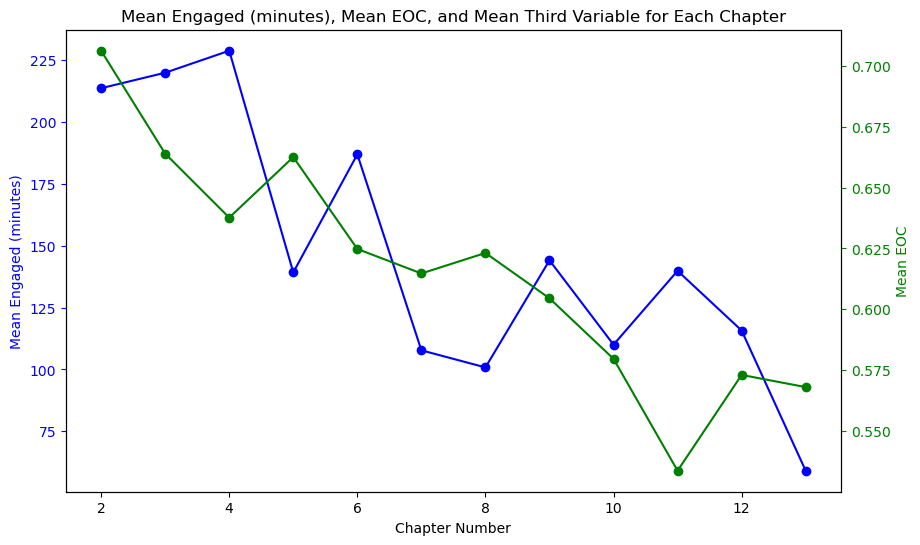

In [17]:
import matplotlib.pyplot as plt

# Calculate the mean engaged for each chapter
mean_engaged = merged_df.groupby('chapter_number')['engaged_minutes'].mean().reset_index()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the line for mean engaged on the left y-axis
ax1.plot(mean_engaged['chapter_number'], mean_engaged['engaged_minutes'], color='blue', marker='o', label='Mean Engaged (minutes)')
ax1.set_xlabel('Chapter Number')
ax1.set_ylabel('Mean Engaged (minutes)', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for 'EOC'
ax2 = ax1.twinx()

# Calculate the mean EOC for each chapter
mean_eoc = merged_df.groupby('chapter_number')['EOC'].mean().reset_index()

# Plotting the line for 'EOC' on the right y-axis
ax2.plot(mean_engaged['chapter_number'], mean_eoc['EOC'], color='green', marker='o', label='Mean EOC')
ax2.set_ylabel('Mean EOC', color='green')
ax2.tick_params('y', colors='green')

plt.title('Mean Engaged (minutes), Mean EOC, and Mean Third Variable for Each Chapter')
plt.show()